<a href="https://colab.research.google.com/github/Negm-elgaan/doom/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
path = '/content/student_scores - student_scores.csv'
data = pd.read_csv(path)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
data.shape

(25, 2)

In [67]:
x = data.drop('Scores',axis = 1)
y = data['Scores']

In [68]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [69]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

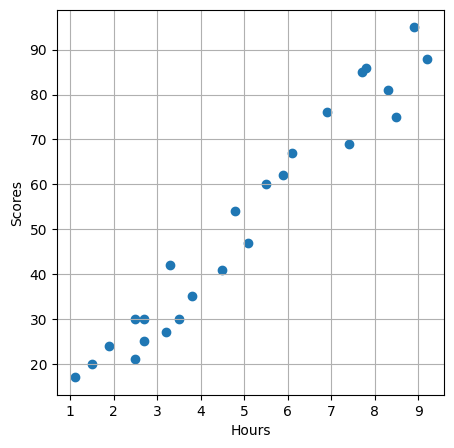

In [70]:
plt.figure(figsize = (5,5))
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show

In [71]:
from sklearn import datasets,model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 23)

In [73]:
from sklearn.linear_model import  LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [74]:
alpha = LR.intercept_
beta = LR.coef_
print("alpha",alpha)
print("beta",beta)

alpha -0.33798242262133016
beta [10.28085594]


In [75]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

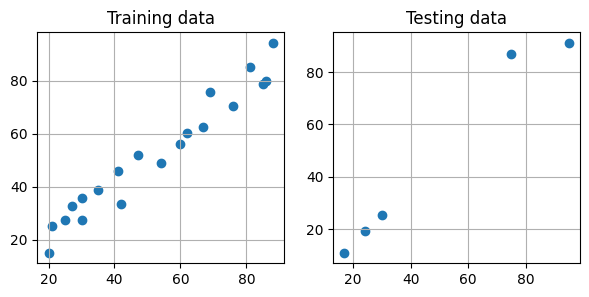

In [76]:
plt.figure(figsize = (7,3))
# subplot 1
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train)
plt.title("Training data")
plt.grid(True)

# subplot 2
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test)
plt.title("Testing data")
plt.grid(True)
plt.show()

In [77]:
mse_train = mean_squared_error(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

In [85]:
# create a dataframe of the results
data1 = {
    'Metric' : ['MSE','MAE','MSE','MAE'],
    'Data' : ['train','train','test','test'],
    'Values' : [mse_train,mae_train,mse_test,mae_test]
}
performance = pd.DataFrame(data1)
performance.T

,0,1,2,3
Metric,MSE,MAE,MSE,MAE
Data,train,train,test,test
Values,26.118428,4.871914,48.168143,6.271379
